In [1]:
import pandas as pd
df= pd.read_csv("datalocale.csv",index_col=[0,1])
df.fillna(0)
df.head()

,,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,user_id,,,,,,,,,,,,,,,,,
132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [2]:
print (df['vehicle_model_id'].unique())

[28 12 65 24 87 54 85 17 23 36 72 30 43 86 76  1 69 14 89 10 13 64 90 75
 70 91 39]


In [3]:
vehiclemodeldemand= {}
for i in df['vehicle_model_id'].unique():
    vehiclemodeldemand[i]= df[df['vehicle_model_id']==i].shape[0]
vehiclemodeldemand= pd.Series(vehiclemodeldemand).sort_values(ascending=False)
print (vehiclemodeldemand)

12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
43        2
72        2
1         2
69        1
75        1
70        1
14        1
76        1
39        1
dtype: int64


In [4]:
#checking peak demand hours
import datetime as dt
import numpy as np
def roundtime(t):
    if t.minute >= 30:
        return t.replace(second=0, minute=0, hour=(t.hour+1)%24)
    else:
        return t.replace(second=0, minute=0)
def returnhour(t):
    return t.hour
df['Booking Time']= pd.to_datetime(df['booking_created']).dt.time
df['Booking Time']=df['Booking Time'].apply(roundtime)
df['Booking Time']=df['Booking Time'].apply(returnhour)
hourwisedemand= {}
for i in np.sort(df['Booking Time'].unique()):
    hourwisedemand[i]= df[df['Booking Time']==i].shape[0]
hourwisedemand=pd.Series(hourwisedemand)
print (hourwisedemand.sort_values(ascending=False,inplace= False))

11    3054
12    2946
20    2766
10    2751
17    2628
13    2628
19    2610
15    2602
16    2577
18    2565
21    2546
14    2439
22    2211
23    2000
9     1994
8     1479
0     1278
7      725
1      666
2      322
6      224
3      171
4      131
5      118
dtype: int64


In [5]:
#Vehicle model Demand vs Time
import matplotlib.pyplot as plt
x= df['Booking Time']
y= df['vehicle_model_id']
plt.figure(figsize=(8,15))
plt.scatter(x,y,marker='o')
plt.xticks(ticks= df['Booking Time'].unique())
plt.yticks(ticks= df['vehicle_model_id'].unique())
plt.show()

<Figure size 800x1500 with 1 Axes>

In [6]:
areawisedemand= {}
for i in df['from_area_id'].unique():
    areawisedemand[i]= df[df['from_area_id']==i].shape[0]
areawisedemand=pd.Series(areawisedemand)
print (areawisedemand.sort_values(ascending= False,inplace= False))

 393.0     3858
 571.0     1631
 293.0     1052
 585.0      911
 1010.0     768
 142.0      727
 83.0       719
 1384.0     628
 1096.0     542
 58.0       466
 269.0      413
 1026.0     395
 625.0      370
 1017.0     363
 1330.0     362
 689.0      341
 768.0      334
 271.0      333
 1056.0     330
 1371.0     327
 1068.0     324
 363.0      308
 396.0      289
 1021.0     279
 1365.0     273
 105.0      271
 410.0      266
 458.0      261
 515.0      251
 776.0      249
           ... 
 1113.0       1
 1201.0       1
 79.0         1
 1343.0       1
 1209.0       1
 133.0        1
 185.0        1
 1215.0       1
 1125.0       1
 72.0         1
 1252.0       1
 1158.0       1
 1042.0       1
 1206.0       1
 235.0        1
 1092.0       1
 1178.0       1
 1265.0       1
 384.0        1
 1380.0       1
 369.0        1
 483.0        1
 1235.0       1
 68.0         1
 1094.0       1
 770.0        1
 1345.0       1
 733.0        1
 1403.0       1
NaN           0
Length: 599, dtype: int6

In [7]:
toareawisedemand= {}
for i in df['to_area_id'].unique():
    toareawisedemand[i]= df[df['to_area_id']==i].shape[0]
toareawisedemand=pd.Series(toareawisedemand)
print (toareawisedemand.sort_values(ascending=False,inplace=False))

 393.0     8777
 585.0     2339
 1384.0    1237
 571.0      664
 293.0      555
 1010.0     480
 83.0       365
 168.0      338
 1371.0     332
 452.0      330
 142.0      326
 1026.0     319
 1068.0     313
 572.0      310
 1021.0     276
 392.0      270
 1192.0     234
 1017.0     227
 58.0       220
 1096.0     217
 768.0      200
 271.0      195
 136.0      187
 1393.0     185
 1330.0     180
 625.0      179
 455.0      172
 269.0      166
 1056.0     164
 767.0      162
           ... 
 1196.0       1
 1369.0       1
 1110.0       1
 17.0         1
 1201.0       1
 1290.0       1
 1356.0       1
 1233.0       1
 1127.0       1
 1271.0       1
 644.0        1
 428.0        1
 1368.0       1
 201.0        1
 301.0        1
 1360.0       1
 262.0        1
 326.0        1
 1118.0       1
 1326.0       1
 1207.0       1
 133.0        1
 215.0        1
 1252.0       1
 1124.0       1
 216.0        1
 174.0        1
 1343.0       1
 1403.0       1
NaN           0
Length: 569, dtype: int6

In [8]:
typewisedemand= {}
for i in df['travel_type_id'].unique():
    typewisedemand[i]= df[df['travel_type_id']==i].shape[0]
typewisedemand=pd.Series(typewisedemand)
print (typewisedemand.sort_values(ascending=False,inplace=False))

2    34292
3     7550
1     1589
dtype: int64


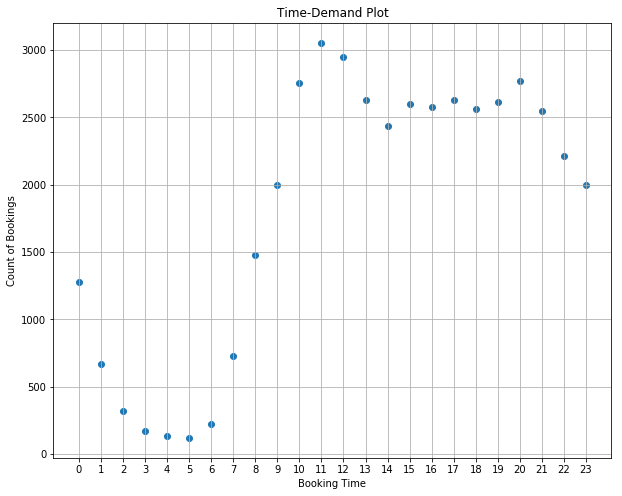

In [9]:
plt.figure(figsize=(10,8))
x= np.sort(df['Booking Time'].unique())
y= np.array(hourwisedemand)
plt.scatter(x,y,marker='o')
plt.xticks(x)
plt.grid()
plt.xlabel('Booking Time')
plt.ylabel('Count of Bookings')
plt.title("Time-Demand Plot")
plt.show()

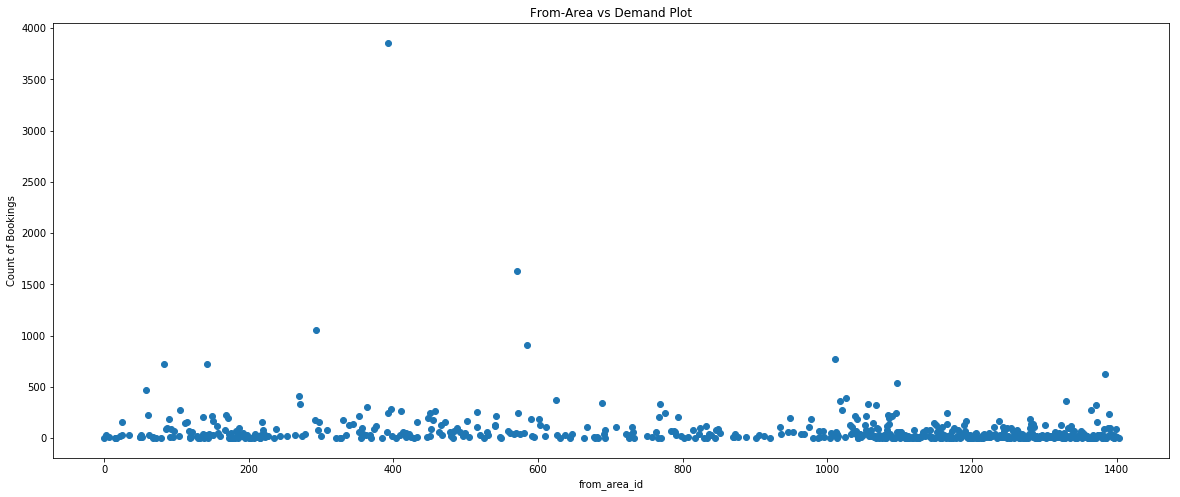

In [10]:
plt.figure(figsize=(20,8))
x= df['from_area_id'].fillna(0).unique()
y= np.array(areawisedemand.fillna(0))
plt.scatter(x,y,marker='o')
plt.xlabel('from_area_id')
plt.ylabel('Count of Bookings')
plt.title("From-Area vs Demand Plot")
plt.show()

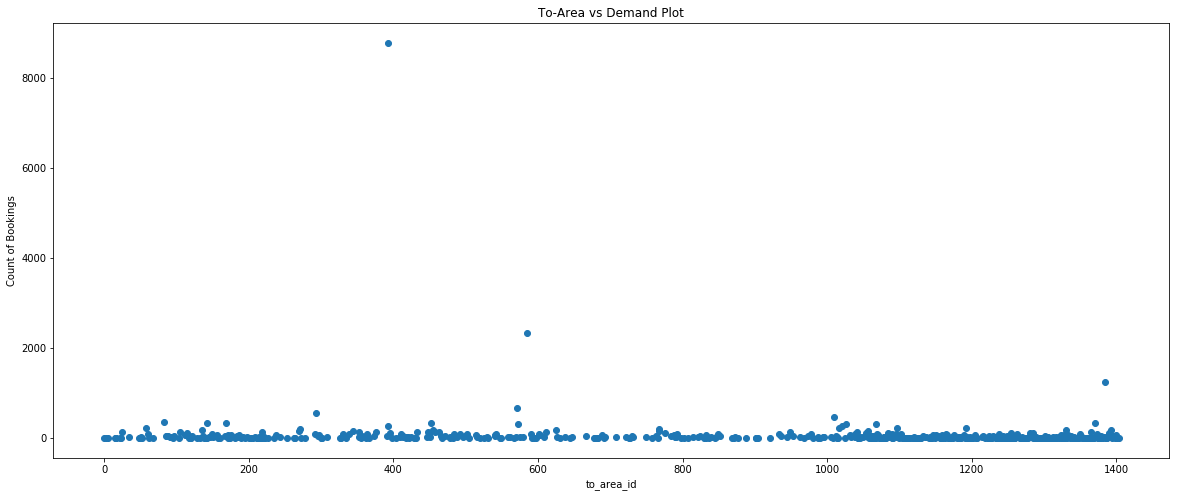

In [11]:
plt.figure(figsize=(20,8))
x= df['to_area_id'].fillna(0).unique()
y= np.array(toareawisedemand.fillna(0))
plt.scatter(x,y,marker='o')
plt.xlabel('to_area_id')
plt.ylabel('Count of Bookings')
plt.title("To-Area vs Demand Plot")
plt.show()

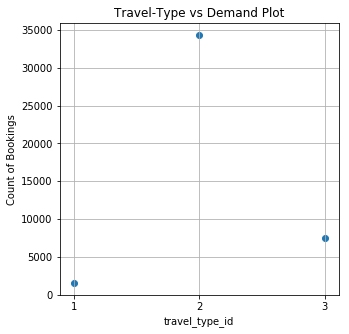

In [12]:
plt.figure(figsize=(5,5))
x= df['travel_type_id'].unique()
y= np.array(typewisedemand)
plt.scatter(x,y,marker='o')
plt.xticks(x)
plt.grid()
plt.xlabel('travel_type_id')
plt.ylabel('Count of Bookings')
plt.title("Travel-Type vs Demand Plot")
plt.show()

In [13]:
df[:1]['travel_type_id'][0] #0th booking
def surge_multiplier(booking):
    s= 1
    if booking['travel_type_id']==2:
        s+=0.2
    if booking['Booking Time'] in [10,11,12,20]:
        s+=0.8
    if booking['Booking Time'] in [13,14,15,16,17,18,19,21]:
        s+=0.5
    if booking['Booking Time'] in [9,22,23]:
        s+=0.1
    if booking['from_area_id']==393.0:
        s+=0.8
    if booking['from_area_id'] in [571.0,293.0]:
        s+=0.4
    if booking['from_area_id'] in [585.0,1010.0,142.0,83.0]:
        s+=0.3
    if booking['from_area_id'] in [1384.0,1096.0]:
        s+=0.1
    if booking['to_area_id']==393.0:
        s+=1
    if booking['to_area_id']==585.0:
        s+=0.3
    if booking['to_area_id']==1384.0:
        s+=0.1
    return s
bkid= int(input("Enter Booking ID: "))
userid= int(input("Enter User ID: "))
multiplier= surge_multiplier(df.loc[bkid,userid])
print ("Surge=",multiplier,"x")

Enter Booking ID: 132512
Enter User ID: 22177
Surge= 1.5 x
